In [1]:
#### https://gitlab.ethz.ch/socceranalytics/uefa-euro-2020/-/snippets/508
# 508

import pandas as pd
import json
import matplotlib.pyplot as plt

# HOME TEAM: TODO -> Change this
home = "Austria"

# AWAY TEAM: TODO -> Change this
away = "North Macedonia"

# STATSBOMB EVENT DATA LOCATION: TODO -> Change this
sb_event_data = "../../data/statsbomb360/lineups/3788747.json"

# FIFA PLAYERS LOCATION: TODO -> Change this
fifa_data = "../../data/players_22.csv"

with open(sb_event_data, "r") as read_file:
    statsbomb_lineup = json.load(read_file)

home_names = [hpl["player_name"] for hpl in statsbomb_lineup[0]["lineup"]]
away_names = [apl["player_name"] for apl in statsbomb_lineup[1]["lineup"]]

In [2]:
df = pd.read_csv(fifa_data)
df.head()

/var/folders/vy/fdg6rdgj1z78drdkxk4rt8j00000gn/T/ipykernel_57762/1164068694.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fifa_data)


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [3]:
# TODO: As Laporte was in France, and Toloi was in Brazil, we added France and Brazil here. Change them accordingly!

fifa_home_players = df[df["nationality_name"].isin([home, "Austria"])] 
fifa_away_players = df[df["nationality_name"].isin([away, "North Macedonia"])] 

print(len(fifa_home_players))
print(len(fifa_away_players))

319
28


In [4]:
col_names_attacking = [col for col in df.columns if str(col).startswith("attacking_")]
col_names_skill = [col for col in df.columns if str(col).startswith("skill_")]
col_names_movement = [col for col in df.columns if str(col).startswith("movement_")]
col_names_power = [col for col in df.columns if str(col).startswith("power_")]
col_names_mentality = [col for col in df.columns if str(col).startswith("mentality_")]
col_names_defending = [col for col in df.columns if str(col).startswith("defending_")]
col_names_goalkeeping = [col for col in df.columns if str(col).startswith("goalkeeping_")]

all_col_names = col_names_attacking + col_names_skill + col_names_movement + col_names_power + col_names_mentality + col_names_defending + col_names_goalkeeping

In [13]:
from nltk.metrics.distance import jaro_similarity

home_name_matches = []

for name in home_names:

    best_so_far = -9999999
    best_ind_so_far = 0

    for row in range(len(fifa_home_players)):

        sim_metric = jaro_similarity(fifa_home_players.iloc[row]["long_name"], name)

        if sim_metric > best_so_far:
            best_so_far = sim_metric
            best_ind_so_far = row
        
    
    dict_to_append = {"fifa_name": fifa_home_players.iloc[best_ind_so_far]["long_name"], "statsbomb_name": name, "sofifa_id": fifa_home_players.iloc[best_ind_so_far]["sofifa_id"]}
    home_name_matches.append(dict_to_append)

# TODO: Uncomment and check the below for matching items in the list,
# sometimes players might be in a different nation in FIFA (ex. Aymeric Laporte is in France),
# so find the missing player and append the location, should work relatively well.

home_name_matches

[{'fifa_name': 'Marko Arnautović',
  'statsbomb_name': 'Marko Arnautović',
  'sofifa_id': 184200},
 {'fifa_name': 'Aleksandar Dragović',
  'statsbomb_name': 'Aleksandar Dragović',
  'sofifa_id': 189060},
 {'fifa_name': 'David Olatukunbo Alaba',
  'statsbomb_name': 'David Olatukunbo Alaba',
  'sofifa_id': 197445},
 {'fifa_name': 'Martin Hinteregger',
  'statsbomb_name': 'Martin Hinteregger',
  'sofifa_id': 201922},
 {'fifa_name': 'Michael Gregoritsch',
  'statsbomb_name': 'Michael Gregoritsch',
  'sofifa_id': 199439},
 {'fifa_name': 'Konrad Laimer',
  'statsbomb_name': 'Konrad Laimer',
  'sofifa_id': 225375},
 {'fifa_name': 'Stefan Ilsanker',
  'statsbomb_name': 'Stefan Ilsanker',
  'sofifa_id': 194665},
 {'fifa_name': 'Marcel Sabitzer',
  'statsbomb_name': 'Marcel Sabitzer',
  'sofifa_id': 204923},
 {'fifa_name': 'Alexander Schlager',
  'statsbomb_name': 'Alexander Schlager',
  'sofifa_id': 215522},
 {'fifa_name': 'Xaver Schlager',
  'statsbomb_name': 'Xaver Schlager',
  'sofifa_id': 2

In [14]:
away_name_matches = []

for name in away_names:

    best_so_far = -9999999
    best_ind_so_far = 0

    for row in range(len(fifa_away_players)):

        sim_metric = jaro_similarity(fifa_away_players.iloc[row]["long_name"], name)

        if sim_metric > best_so_far:
            best_so_far = sim_metric
            best_ind_so_far = row
        
    
    dict_to_append = {"fifa_name": fifa_away_players.iloc[best_ind_so_far]["long_name"], "statsbomb_name": name, "sofifa_id": fifa_away_players.iloc[best_ind_so_far]["sofifa_id"]}
    away_name_matches.append(dict_to_append)

# TODO: Uncomment and check the below for matching items in the list,
# sometimes players might be in a different nation in FIFA (ex. Aymeric Laporte is in France),
# so find the missing player and append the location, should work relatively well.

away_name_matches

[{'fifa_name': 'Ezgjan Alioski',
  'statsbomb_name': 'Ezgjan Alioski',
  'sofifa_id': 206006},
 {'fifa_name': 'Enis Bardhi',
  'statsbomb_name': 'Enis Bardhi',
  'sofifa_id': 237239},
 {'fifa_name': 'Goran Pandev',
  'statsbomb_name': 'Goran Pandev',
  'sofifa_id': 137506},
 {'fifa_name': 'Stefan Ristovski',
  'statsbomb_name': 'Stefan Ristovski',
  'sofifa_id': 205965},
 {'fifa_name': 'Eljif Elmas',
  'statsbomb_name': 'Eljif Elmas',
  'sofifa_id': 241390},
 {'fifa_name': 'Mirko Ivanovski',
  'statsbomb_name': 'Ivan Trichkovski',
  'sofifa_id': 200704},
 {'fifa_name': 'Ezgjan Alioski',
  'statsbomb_name': 'Boban Nikolov',
  'sofifa_id': 206006},
 {'fifa_name': 'Arijan Ademi',
  'statsbomb_name': 'Arijan Ademi',
  'sofifa_id': 216350},
 {'fifa_name': 'Stole Dimitrievski',
  'statsbomb_name': 'Stole Dimitrievski',
  'sofifa_id': 211348},
 {'fifa_name': 'Darko Churlinov',
  'statsbomb_name': 'Darko Churlinov',
  'sofifa_id': 251545},
 {'fifa_name': 'Aleksandar Trajkovski',
  'statsbomb_n

In [26]:
# TODO: HERE INPUT YOUR OWN TEAMS' POSITION MATCHINGS -> for our match it was the following list
# Make sure the strings are contained in the name matches above.

#position_by_position_matching = [["Donnarumma", "De Gea"] , ["Hinteregger", "Jordi Alba"], ["Bonucci", "Laporte"], ["Chiellini", "Eric Gar"], ["Di Lorenzo", "Azpili"], \
    #["Barella", "Merodio"], ["Filho", "Busquets"], ["Verratti", "Pedro Gon"], ["Insigne", "Ferran"], ["Immobile", "Olmo"], ["Chiesa", "Oyarzab"]]



position_by_position_matching = [["Bachmann", "Dimitrievski"], ["Hinteregger", "Ivanovski"], ["Alaba", "Colakovski"], ["Dragović", "Ristovski"], ["Ulmer", "Alioski"], ["Lainer", "Alioski"], ["Schlager", "Ademi"], ["Sabitzer", "Elmas"], ["Laimer", "Bardhi"], ["Baumgartner", "Trajkovski"], ["Kalajdžić", "Pandev"]]

home_ids = []
away_ids = []

for matching in position_by_position_matching:
    player_name_h = matching[0]
    player_name_a = matching[1]

    home_item_from_list = [item["sofifa_id"] for item in home_name_matches if player_name_h in item["fifa_name"]]
    away_item_from_list = [item["sofifa_id"] for item in away_name_matches if player_name_a in item["fifa_name"]]
    home_ids.append(home_item_from_list[0])
    away_ids.append(away_item_from_list[0])

In [27]:
def pretty_plot_names(col_names):
    to_ret = []
    for name in col_names:
        if "goalkeeping" not in name:
            splitted = name.split("_")[1:]
            to_ret.append(" ".join(splitted))
        else:
            splitted = name.split("_")
            splitted = "g" + "_" + splitted[1]
            to_ret.append(splitted)

    return to_ret
    

<Figure size 432x288 with 0 Axes>

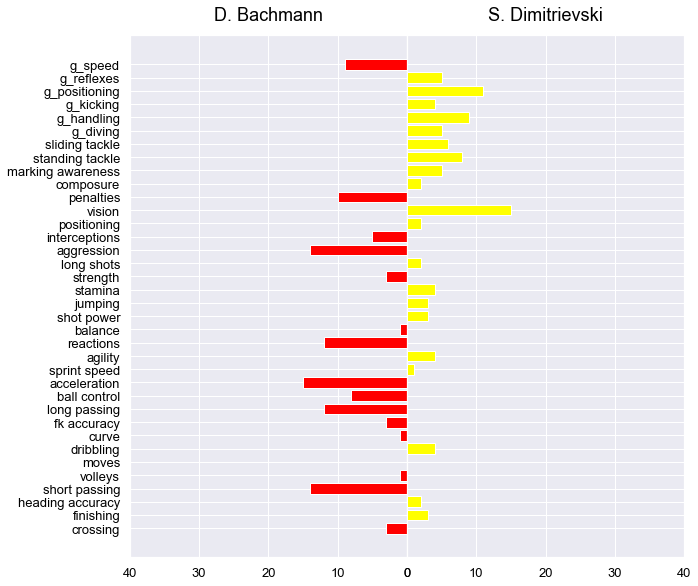

<Figure size 432x288 with 0 Axes>

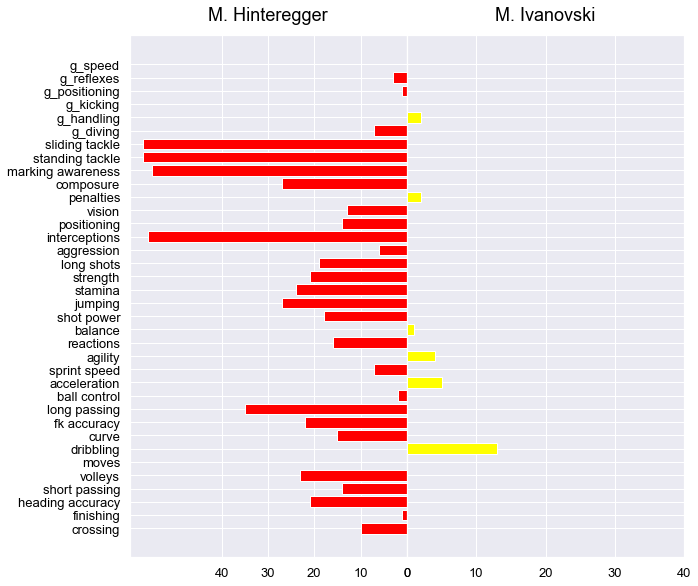

<Figure size 432x288 with 0 Axes>

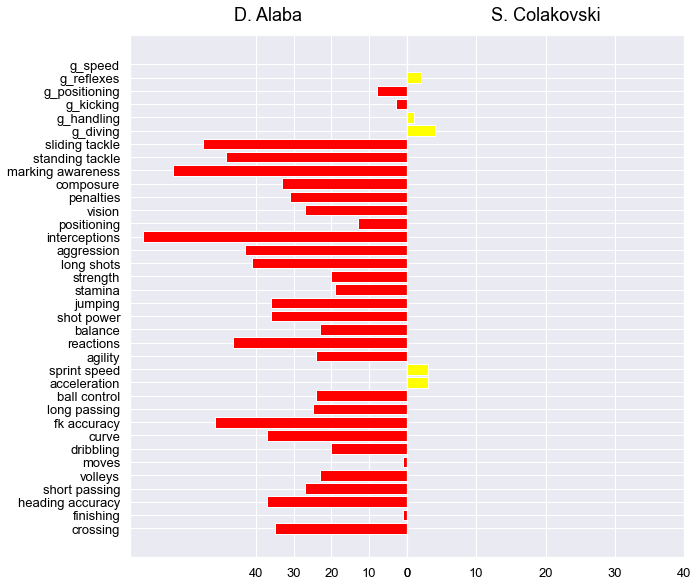

<Figure size 432x288 with 0 Axes>

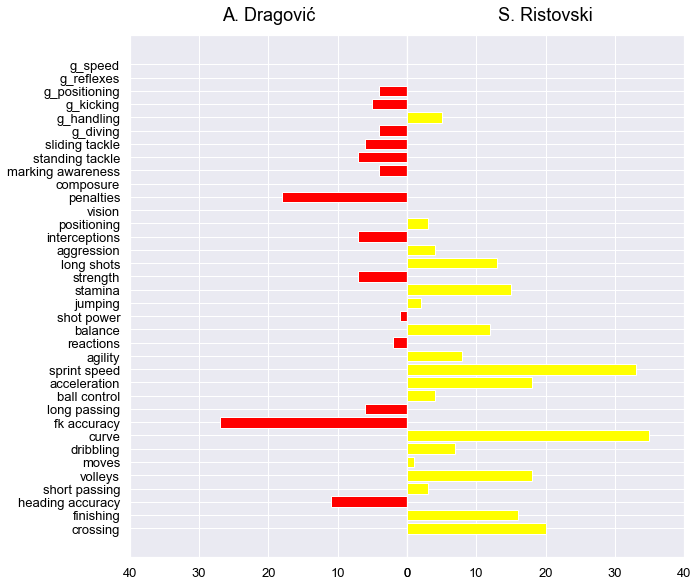

<Figure size 432x288 with 0 Axes>

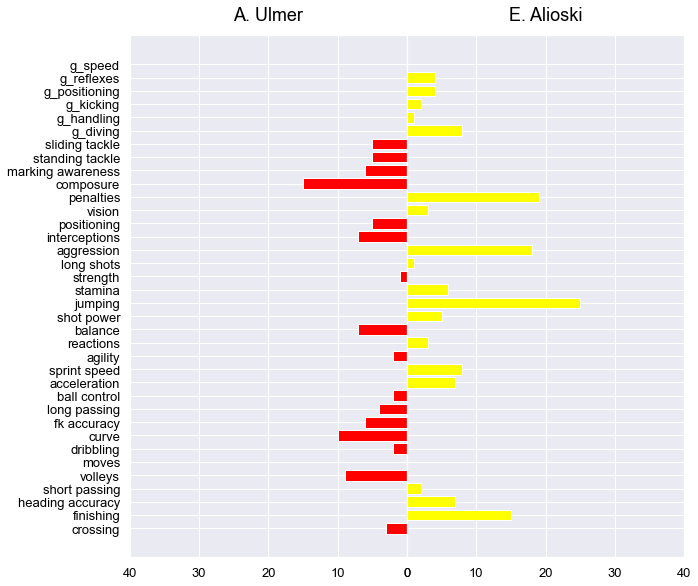

<Figure size 432x288 with 0 Axes>

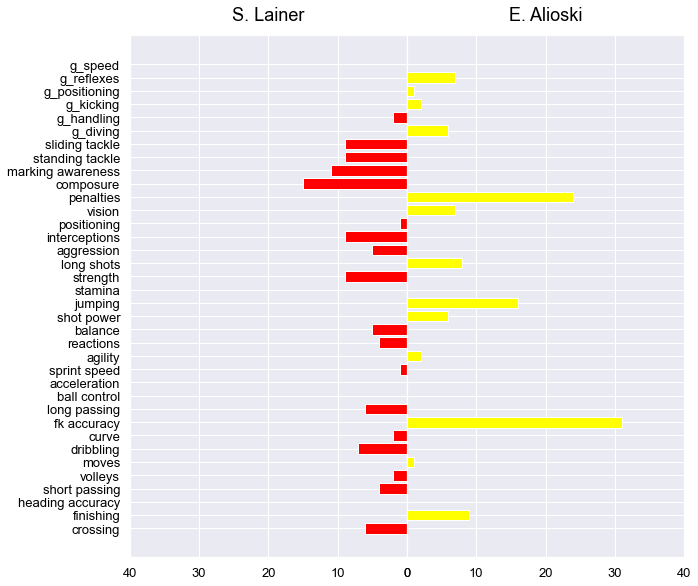

<Figure size 432x288 with 0 Axes>

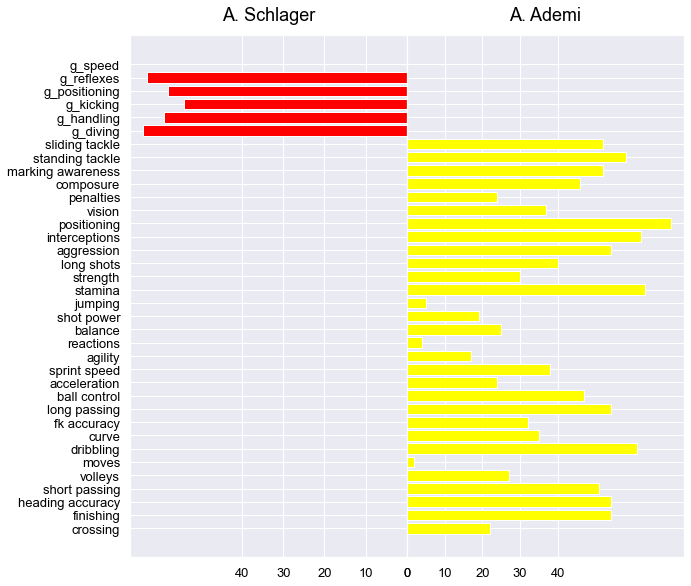

<Figure size 432x288 with 0 Axes>

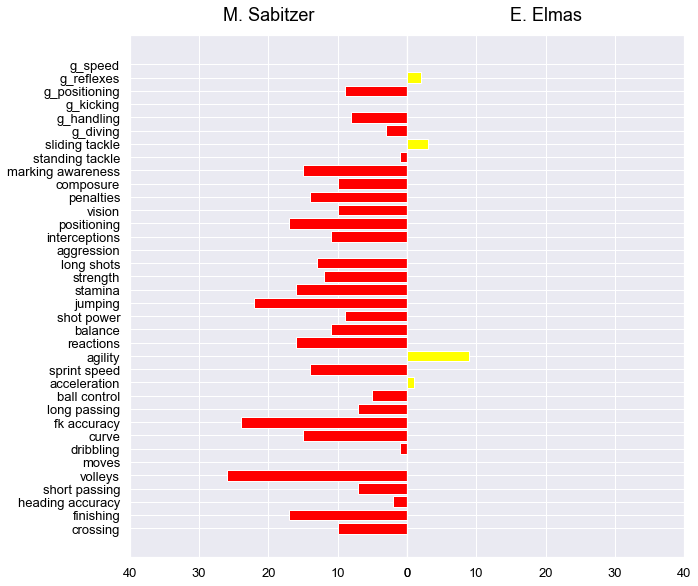

<Figure size 432x288 with 0 Axes>

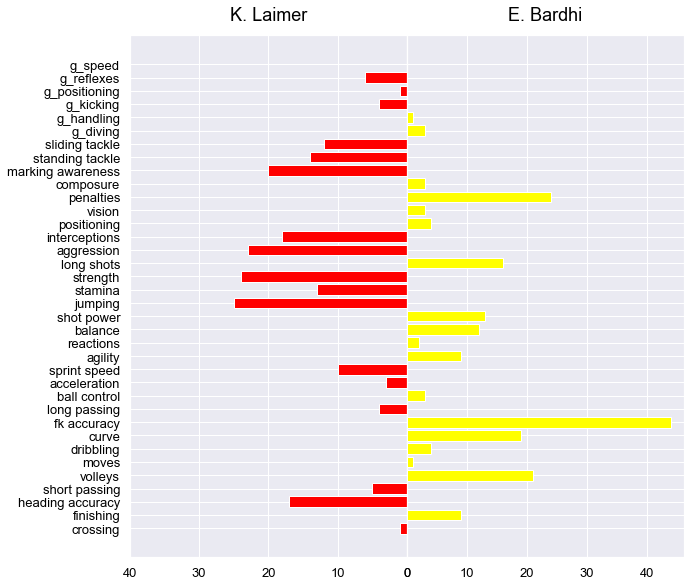

<Figure size 432x288 with 0 Axes>

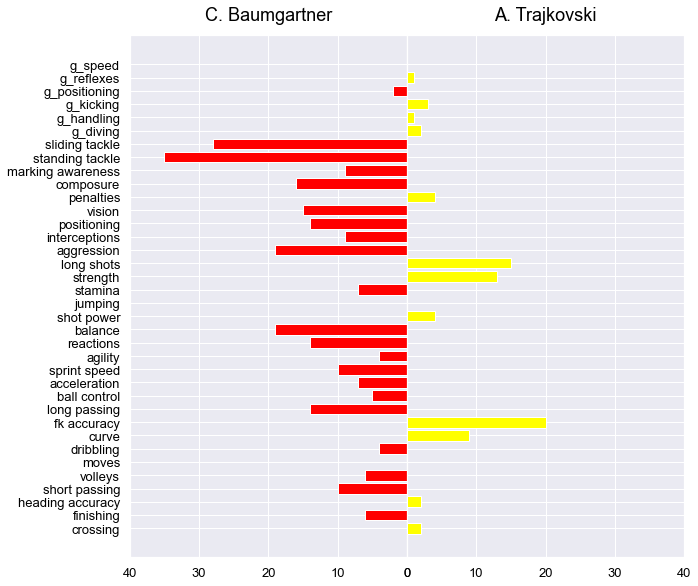

<Figure size 432x288 with 0 Axes>

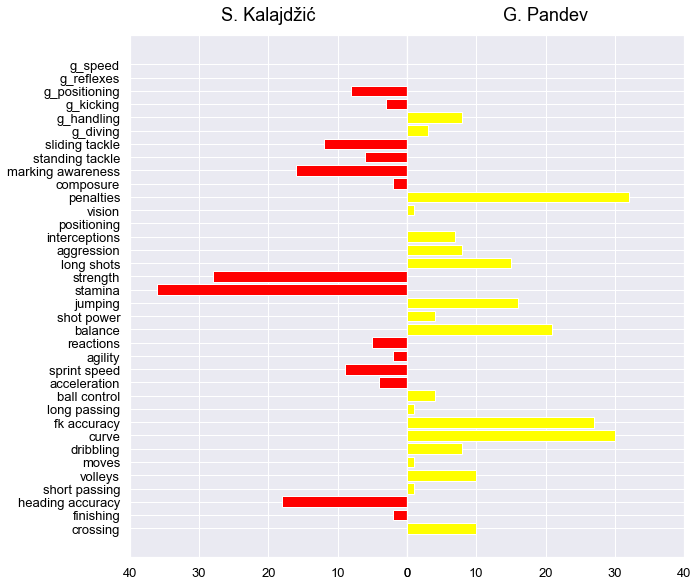

In [33]:
# PREPARE DATA and PLOT HISTOGRAMS

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

font_color = 'black'
facecolor = 'white'
color_red = 'yellow'
color_blue = 'red'
hfont = {'fontname':'sans'}

ynames = pretty_plot_names(all_col_names)

# TODO: uncomment the following line if you would like to see all plots
#for match in range(len(home_ids)): 
for match in range(11):
    plt.figure()
    fig, axes = plt.subplots(figsize=(10,5), ncols=2, sharey=True, facecolor=facecolor)
    fig.tight_layout()

    col_0 = df[df["sofifa_id"] == home_ids[match]]
    col_1 = df[df["sofifa_id"] == away_ids[match]]

    title0 = col_0["short_name"].values[0]
    title1 = col_1["short_name"].values[0]

    nets = col_1[all_col_names].values.flatten() - col_0[all_col_names].values.flatten()
    nets_it = [int(-1*i) if i < 0 else 0 for i in nets]
    nets_sp = [int(i) if i > 0 else 0 for i in nets]

    axes[0].barh(ynames, nets_it, align='center', color=color_blue, zorder=10)
    axes[0].set_title(title0, fontsize=18, pad=15, color='black', **hfont)
    axes[1].barh(ynames, nets_sp, align='center', color=color_red, zorder=10)
    axes[1].set_title(title1, fontsize=18, pad=15, color='black', **hfont)
    axes[0].set_xticks([0, 10, 20, 30, 40])
    axes[1].set_xticks([0, 10, 20, 30, 40])
    axes[0].invert_xaxis()

    axes[0].set(yticks=ynames, yticklabels=ynames)
    axes[0].yaxis.tick_left()
    axes[0].tick_params(axis='y', colors='white') # tick color
    
    for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
        label.set(fontsize=13, color=font_color, **hfont)
    for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
        label.set(fontsize=13, color=font_color, **hfont)

    plt.subplots_adjust(wspace=0, top=1.5, bottom=0.05, left=0.18, right=0.95)
    plt.show()